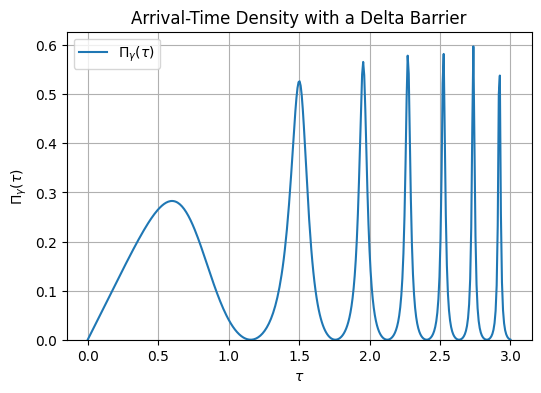

In [1]:
import numpy as np
import mpmath as mp
import matplotlib.pyplot as plt

# Parameters
gamma = 1.0
L     = 1.0

# Define the Airy derivative Ai'(x) by numerical differentiation
def Ai_prime(x):
    return mp.diff(mp.airyai, x)

# Define the arrival-time density Pi_gamma(tau)
def Pi_gamma(tau, gamma, L):
    if tau <= 0:
        # By construction, arrival time density is zero for tau < 0
        return 0
    # Numerator: 2*tau * Ai[ - (L + tau^2) ]^2
    num = 2.0 * tau * (mp.airyai(-(L + tau**2)))**2
    # Denominator: 1 + (2*tau*gamma*Ai'(-(L + tau^2)))^2
    denom = 1.0 + (2.0 * tau * gamma * Ai_prime(-(L + tau**2)))**2
    return num / denom

# Create a grid of tau values
tau_vals = np.linspace(0, 3, 400)

# Compute Pi_gamma on the grid
pi_vals = [Pi_gamma(t, gamma, L) for t in tau_vals]

# Plot
plt.figure(figsize=(6,4))
plt.plot(tau_vals, pi_vals, label=r'$\Pi_{\gamma}(\tau)$')
plt.title("Arrival-Time Density with a Delta Barrier")
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\Pi_{\gamma}(\tau)$')
plt.ylim(bottom=0)
plt.legend()
plt.grid(True)
plt.show()